### Test LinUCB, ThresholdBandit and GreedyBandit

In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

from lib.bandits import LinUCB, ThresholdBandit 
from lib.generator import LinearGeneratorParams, LinearGenerator
import numpy as np 

import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
def first_nonzero(arr, axis, invalid_val=-1):
    mask = arr!=0
    return np.where(mask.any(axis=axis), mask.argmax(axis=axis), invalid_val)

def smooth(y, box_pts=100):
    box = np.ones(box_pts)/box_pts
    if len(y.shape) == 2:
        y_smooth = y.copy()
        for i in range(y.shape[0]):
            y_smooth[i,:] = np.convolve(y[i,:], box, mode='same')
    else:
        y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [3]:
#alphas = truncnorm.rvs(-max_alpha, max_alpha, scale = 1, size=(M,k,d-1))
#betas = truncnorm.rvs(-max_beta, max_beta, scale = 1, size=(M,k))

alphas = np.array([[0, 2]]).T
betas = np.array([1, 0])
N = 3000
M = 100
params = LinearGeneratorParams(alphas, betas)
generator = LinearGenerator(params)

### LinUCB 

In [4]:
linucb = LinUCB(generator)

linucb_pred = np.zeros((M, 2, N))
linucb_upper = np.zeros((M, 2, N))
linucb_lower = np.zeros((M, 2, N))

regret_ucb = np.zeros(N)
N = 3000
for i in range(N):
    (ctx, arm_idx, obs, reg) = linucb.step()
    p0, u0, l0 = linucb.pred_arm(0, M)
    p1, u1, l1 = linucb.pred_arm(1, M)
    linucb_pred[:,0,i] = p0
    linucb_upper[:,0,i] = u0
    linucb_lower[:,0,i] = l0
    linucb_pred[:,1,i] = p1
    linucb_upper[:,1,i] = u1
    linucb_lower[:,1,i] = l1    
    regret_ucb[i] = reg
    #print np.sqrt(np.log(np.linalg.det(linucb.V)))
    #arm = linucb.arms([1, 0.5], arm_idx)
    #pred = linucb.beta(linucb.V)*np.sqrt(np.dot(arm.T, np.dot(np.linalg.inv(linucb.V), arm)))
    #print pred
    
theta = np.dot(np.linalg.inv(linucb.V), linucb.U)
print(theta)

[[ 0.99773991]
 [ 0.02960453]
 [ 0.02744896]
 [ 1.9625731 ]]


In [5]:
#Make plots of LinUCB confidence interval
xvals = np.linspace(-0.5, 1.5, M)
preds = np.zeros((M, 2))
preds_up = np.zeros((M, 2))
preds_low = np.zeros((M, 2))
for arm_idx in range(2):
    for i in range(M):
        preds[i,arm_idx] = linucb.predict([1, xvals[i]], arm_idx)
        preds_up[i,arm_idx] = linucb.predict_upper([1, xvals[i]], arm_idx)
        preds_low[i,arm_idx] = linucb.predict_lower([1, xvals[i]], arm_idx)

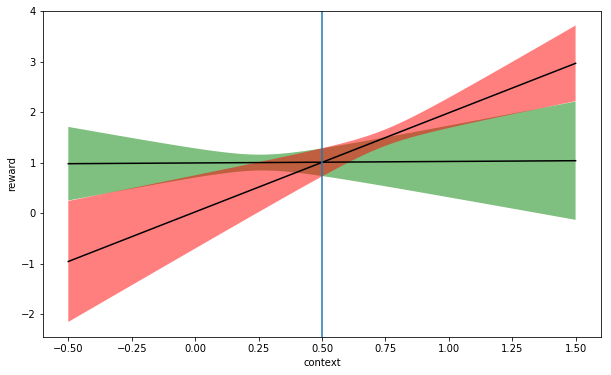

In [6]:
plt.fill_between(xvals, preds_low[:,0], preds_up[:,0], facecolor='green', alpha = 0.5)
plt.plot(xvals, preds[:,0], color='black')

plt.fill_between(xvals, preds_low[:,1], preds_up[:,1], facecolor='red', alpha = 0.5)
plt.plot(xvals, preds[:,1], color='black')

plt.axvline(x = 0.5)

plt.xlabel('context')
plt.ylabel('reward')

In [7]:
#Do confidence bounds decrease with iterations?

### Threshold bandit

In [4]:
threshold = 0.8
thresholdbandit = ThresholdBandit(generator, threshold)
#print thresholdbandit.threshold

N = 4000

thresh_pred = np.zeros((M, 2, N))
thresh_upper = np.zeros((M, 2, N))
thresh_lower = np.zeros((M, 2, N))

#Record if the policy changes

regret_thr = np.zeros((N))
for i in range(N):
    (ctx, arm_idx, obs, reg) = thresholdbandit.step()
    regret_thr[i] = reg
    p0, u0, l0 = thresholdbandit.pred_arm(0, M)
    p1, u1, l1 = thresholdbandit.pred_arm(1, M)
    thresh_pred[:,0,i] = p0
    thresh_upper[:,0,i] = u0
    thresh_lower[:,0,i] = l0
    thresh_pred[:,1,i] = p1
    thresh_upper[:,1,i] = u1
    thresh_lower[:,1,i] = l1
    #thr = thresholdbandit.threshold
    #lb = thresholdbandit.lower_bound
    #ub = thresholdbandit.upper_bound
    print("i:%d,ctx:%f,arm:%d,rew:%f,regret:%f"%(i, ctx[1], arm_idx, obs, reg))

theta = np.dot(np.linalg.inv(thresholdbandit.V), thresholdbandit.U)
print(theta)

i:0,ctx:0.304013,arm:0,rew:0.937097,regret:0.000000
i:1,ctx:0.897665,arm:0,rew:1.025975,regret:0.795331
i:2,ctx:0.427086,arm:0,rew:0.883438,regret:0.000000
i:3,ctx:0.859012,arm:0,rew:1.055149,regret:0.718025
i:4,ctx:0.565395,arm:0,rew:0.963872,regret:0.130791
i:5,ctx:0.460919,arm:0,rew:1.005181,regret:0.000000
i:6,ctx:0.733425,arm:0,rew:1.078110,regret:0.466850
i:7,ctx:0.383826,arm:0,rew:1.138467,regret:0.000000
i:8,ctx:0.888972,arm:0,rew:1.145491,regret:0.777945
i:9,ctx:0.204924,arm:0,rew:1.021106,regret:0.000000
i:10,ctx:0.757457,arm:0,rew:0.867016,regret:0.514913
i:11,ctx:0.127597,arm:0,rew:1.023922,regret:0.000000
i:12,ctx:0.715591,arm:0,rew:1.092024,regret:0.431182
i:13,ctx:0.075547,arm:0,rew:0.940440,regret:0.000000
i:14,ctx:0.423534,arm:0,rew:1.070642,regret:0.000000
i:15,ctx:0.359368,arm:0,rew:0.942526,regret:0.000000
i:16,ctx:0.221660,arm:0,rew:0.862870,regret:0.000000
i:17,ctx:0.714499,arm:0,rew:1.025199,regret:0.428997
i:18,ctx:0.580755,arm:0,rew:1.003895,regret:0.161511
i:1

i:160,ctx:0.026157,arm:0,rew:1.080655,regret:0.000000
i:161,ctx:0.693127,arm:1,rew:1.401498,regret:0.000000
i:162,ctx:0.859141,arm:1,rew:1.712025,regret:0.000000
i:163,ctx:0.218002,arm:0,rew:0.968974,regret:0.000000
i:164,ctx:0.811552,arm:1,rew:1.768723,regret:0.000000
i:165,ctx:0.584038,arm:1,rew:1.253550,regret:0.000000
i:166,ctx:0.125623,arm:0,rew:1.056881,regret:0.000000
i:167,ctx:0.972386,arm:1,rew:1.999310,regret:0.000000
i:168,ctx:0.934458,arm:1,rew:1.859604,regret:0.000000
i:169,ctx:0.263042,arm:0,rew:1.028195,regret:0.000000
i:170,ctx:0.493863,arm:1,rew:1.071704,regret:0.012274
i:171,ctx:0.341647,arm:0,rew:0.891258,regret:0.000000
i:172,ctx:0.866290,arm:1,rew:1.568575,regret:0.000000
i:173,ctx:0.161120,arm:0,rew:0.982978,regret:0.000000
i:174,ctx:0.221589,arm:0,rew:0.816953,regret:0.000000
i:175,ctx:0.761097,arm:1,rew:1.551886,regret:0.000000
i:176,ctx:0.408873,arm:0,rew:0.832316,regret:0.000000
i:177,ctx:0.081941,arm:0,rew:0.900820,regret:0.000000
i:178,ctx:0.074740,arm:0,rew

i:314,ctx:0.546463,arm:1,rew:1.174575,regret:0.000000
i:315,ctx:0.260173,arm:0,rew:1.247137,regret:0.000000
i:316,ctx:0.034414,arm:0,rew:1.024797,regret:0.000000
i:317,ctx:0.222136,arm:0,rew:1.104587,regret:0.000000
i:318,ctx:0.661987,arm:1,rew:1.278097,regret:0.000000
i:319,ctx:0.878528,arm:1,rew:1.672836,regret:0.000000
i:320,ctx:0.012111,arm:0,rew:0.989838,regret:0.000000
i:321,ctx:0.261180,arm:0,rew:0.924221,regret:0.000000
i:322,ctx:0.428723,arm:0,rew:1.129499,regret:0.000000
i:323,ctx:0.433157,arm:0,rew:1.002464,regret:0.000000
i:324,ctx:0.367536,arm:0,rew:1.072261,regret:0.000000
i:325,ctx:0.714387,arm:1,rew:1.476530,regret:0.000000
i:326,ctx:0.758917,arm:1,rew:1.614860,regret:0.000000
i:327,ctx:0.859729,arm:1,rew:1.718494,regret:0.000000
i:328,ctx:0.734732,arm:1,rew:1.468432,regret:0.000000
i:329,ctx:0.124873,arm:0,rew:0.925785,regret:0.000000
i:330,ctx:0.262142,arm:0,rew:0.945470,regret:0.000000
i:331,ctx:0.604655,arm:1,rew:1.133885,regret:0.000000
i:332,ctx:0.941300,arm:1,rew

i:470,ctx:0.527103,arm:1,rew:1.032166,regret:0.000000
i:471,ctx:0.371287,arm:0,rew:1.068951,regret:0.000000
i:472,ctx:0.525467,arm:1,rew:1.145589,regret:0.000000
i:473,ctx:0.247437,arm:0,rew:0.991850,regret:0.000000
i:474,ctx:0.810002,arm:1,rew:1.776197,regret:0.000000
i:475,ctx:0.114402,arm:0,rew:0.862481,regret:0.000000
i:476,ctx:0.589009,arm:1,rew:1.199165,regret:0.000000
i:477,ctx:0.225017,arm:0,rew:1.067656,regret:0.000000
i:478,ctx:0.934287,arm:1,rew:1.963708,regret:0.000000
i:479,ctx:0.512591,arm:1,rew:1.192156,regret:0.000000
i:480,ctx:0.141121,arm:0,rew:0.974161,regret:0.000000
i:481,ctx:0.578263,arm:1,rew:1.241669,regret:0.000000
i:482,ctx:0.407014,arm:0,rew:0.970709,regret:0.000000
i:483,ctx:0.566597,arm:1,rew:1.323373,regret:0.000000
i:484,ctx:0.379817,arm:0,rew:1.020491,regret:0.000000
i:485,ctx:0.902289,arm:1,rew:1.833172,regret:0.000000
i:486,ctx:0.977180,arm:1,rew:1.867114,regret:0.000000
i:487,ctx:0.282783,arm:0,rew:0.957233,regret:0.000000
i:488,ctx:0.594610,arm:1,rew

i:626,ctx:0.257525,arm:0,rew:1.005667,regret:0.000000
i:627,ctx:0.801692,arm:1,rew:1.748354,regret:0.000000
i:628,ctx:0.852900,arm:1,rew:1.529806,regret:0.000000
i:629,ctx:0.841222,arm:1,rew:1.696959,regret:0.000000
i:630,ctx:0.642895,arm:1,rew:1.396521,regret:0.000000
i:631,ctx:0.168966,arm:0,rew:1.000623,regret:0.000000
i:632,ctx:0.824710,arm:1,rew:1.635331,regret:0.000000
i:633,ctx:0.188385,arm:0,rew:1.009099,regret:0.000000
i:634,ctx:0.314643,arm:0,rew:1.136656,regret:0.000000
i:635,ctx:0.909842,arm:1,rew:1.691818,regret:0.000000
i:636,ctx:0.972621,arm:1,rew:1.874151,regret:0.000000
i:637,ctx:0.367908,arm:0,rew:0.920515,regret:0.000000
i:638,ctx:0.531493,arm:1,rew:0.916893,regret:0.000000
i:639,ctx:0.223662,arm:0,rew:1.070122,regret:0.000000
i:640,ctx:0.454623,arm:0,rew:1.004015,regret:0.000000
i:641,ctx:0.116954,arm:0,rew:1.057281,regret:0.000000
i:642,ctx:0.578562,arm:1,rew:1.248576,regret:0.000000
i:643,ctx:0.289052,arm:0,rew:1.031555,regret:0.000000
i:644,ctx:0.370898,arm:0,rew

i:785,ctx:0.959157,arm:1,rew:2.121026,regret:0.000000
i:786,ctx:0.384441,arm:0,rew:0.894969,regret:0.000000
i:787,ctx:0.704102,arm:1,rew:1.306560,regret:0.000000
i:788,ctx:0.926879,arm:1,rew:1.956078,regret:0.000000
i:789,ctx:0.266884,arm:0,rew:0.921598,regret:0.000000
i:790,ctx:0.661436,arm:1,rew:1.252942,regret:0.000000
i:791,ctx:0.038523,arm:0,rew:1.005069,regret:0.000000
i:792,ctx:0.934893,arm:1,rew:1.913344,regret:0.000000
i:793,ctx:0.642169,arm:1,rew:1.190973,regret:0.000000
i:794,ctx:0.938138,arm:1,rew:1.976252,regret:0.000000
i:795,ctx:0.443039,arm:0,rew:0.951692,regret:0.000000
i:796,ctx:0.946194,arm:1,rew:1.777233,regret:0.000000
i:797,ctx:0.483640,arm:1,rew:0.943683,regret:0.032720
i:798,ctx:0.816550,arm:1,rew:1.700818,regret:0.000000
i:799,ctx:0.521053,arm:1,rew:1.074660,regret:0.000000
i:800,ctx:0.541851,arm:1,rew:1.231366,regret:0.000000
i:801,ctx:0.815747,arm:1,rew:1.659745,regret:0.000000
i:802,ctx:0.893269,arm:1,rew:1.836740,regret:0.000000
i:803,ctx:0.826793,arm:1,rew

i:946,ctx:0.573354,arm:1,rew:1.125445,regret:0.000000
i:947,ctx:0.446239,arm:0,rew:1.139316,regret:0.000000
i:948,ctx:0.128235,arm:0,rew:0.876091,regret:0.000000
i:949,ctx:0.230107,arm:0,rew:1.030922,regret:0.000000
i:950,ctx:0.305959,arm:0,rew:1.016052,regret:0.000000
i:951,ctx:0.448451,arm:0,rew:1.027295,regret:0.000000
i:952,ctx:0.109740,arm:0,rew:1.057703,regret:0.000000
i:953,ctx:0.623380,arm:1,rew:1.310864,regret:0.000000
i:954,ctx:0.483014,arm:1,rew:0.879122,regret:0.033973
i:955,ctx:0.241617,arm:0,rew:1.081261,regret:0.000000
i:956,ctx:0.943321,arm:1,rew:2.145542,regret:0.000000
i:957,ctx:0.706113,arm:1,rew:1.317841,regret:0.000000
i:958,ctx:0.869091,arm:1,rew:1.721292,regret:0.000000
i:959,ctx:0.296048,arm:0,rew:1.013507,regret:0.000000
i:960,ctx:0.036410,arm:0,rew:1.043228,regret:0.000000
i:961,ctx:0.258146,arm:0,rew:0.986002,regret:0.000000
i:962,ctx:0.208525,arm:0,rew:1.009149,regret:0.000000
i:963,ctx:0.191802,arm:0,rew:1.006736,regret:0.000000
i:964,ctx:0.895206,arm:1,rew

i:1104,ctx:0.307395,arm:0,rew:0.954873,regret:0.000000
i:1105,ctx:0.178132,arm:0,rew:1.015098,regret:0.000000
i:1106,ctx:0.348170,arm:0,rew:1.036284,regret:0.000000
i:1107,ctx:0.782560,arm:1,rew:1.455271,regret:0.000000
i:1108,ctx:0.741115,arm:1,rew:1.400188,regret:0.000000
i:1109,ctx:0.590990,arm:1,rew:1.117041,regret:0.000000
i:1110,ctx:0.802889,arm:1,rew:1.650816,regret:0.000000
i:1111,ctx:0.171638,arm:0,rew:0.960071,regret:0.000000
i:1112,ctx:0.618619,arm:1,rew:1.380213,regret:0.000000
i:1113,ctx:0.406563,arm:0,rew:1.143585,regret:0.000000
i:1114,ctx:0.425974,arm:0,rew:0.857026,regret:0.000000
i:1115,ctx:0.209603,arm:0,rew:1.165916,regret:0.000000
i:1116,ctx:0.374382,arm:0,rew:1.162593,regret:0.000000
i:1117,ctx:0.712181,arm:1,rew:1.452495,regret:0.000000
i:1118,ctx:0.122476,arm:0,rew:0.993038,regret:0.000000
i:1119,ctx:0.246944,arm:0,rew:0.898504,regret:0.000000
i:1120,ctx:0.768509,arm:1,rew:1.554195,regret:0.000000
i:1121,ctx:0.357676,arm:0,rew:1.136444,regret:0.000000
i:1122,ctx

i:1262,ctx:0.259682,arm:0,rew:1.073594,regret:0.000000
i:1263,ctx:0.852290,arm:1,rew:1.858698,regret:0.000000
i:1264,ctx:0.904894,arm:1,rew:1.822194,regret:0.000000
i:1265,ctx:0.399223,arm:0,rew:0.933820,regret:0.000000
i:1266,ctx:0.222377,arm:0,rew:0.872554,regret:0.000000
i:1267,ctx:0.839313,arm:1,rew:1.728604,regret:0.000000
i:1268,ctx:0.030403,arm:0,rew:0.897879,regret:0.000000
i:1269,ctx:0.146611,arm:0,rew:1.093817,regret:0.000000
i:1270,ctx:0.470187,arm:1,rew:0.960608,regret:0.059625
i:1271,ctx:0.744596,arm:1,rew:1.522954,regret:0.000000
i:1272,ctx:0.385604,arm:0,rew:1.033623,regret:0.000000
i:1273,ctx:0.487626,arm:1,rew:1.059399,regret:0.024748
i:1274,ctx:0.314373,arm:0,rew:1.166957,regret:0.000000
i:1275,ctx:0.127386,arm:0,rew:1.073094,regret:0.000000
i:1276,ctx:0.930205,arm:1,rew:2.014679,regret:0.000000
i:1277,ctx:0.680048,arm:1,rew:1.397166,regret:0.000000
i:1278,ctx:0.559821,arm:1,rew:1.048779,regret:0.000000
i:1279,ctx:0.223570,arm:0,rew:0.913071,regret:0.000000
i:1280,ctx

i:1411,ctx:0.322482,arm:0,rew:0.867541,regret:0.000000
i:1412,ctx:0.232888,arm:0,rew:0.957298,regret:0.000000
i:1413,ctx:0.036387,arm:0,rew:1.059247,regret:0.000000
i:1414,ctx:0.002151,arm:0,rew:0.788494,regret:0.000000
i:1415,ctx:0.567825,arm:1,rew:1.111004,regret:0.000000
i:1416,ctx:0.411439,arm:0,rew:1.031171,regret:0.000000
i:1417,ctx:0.974827,arm:1,rew:1.918010,regret:0.000000
i:1418,ctx:0.443621,arm:0,rew:0.881529,regret:0.000000
i:1419,ctx:0.152023,arm:0,rew:1.107748,regret:0.000000
i:1420,ctx:0.164490,arm:0,rew:0.972899,regret:0.000000
i:1421,ctx:0.970857,arm:1,rew:1.884407,regret:0.000000
i:1422,ctx:0.220658,arm:0,rew:0.913876,regret:0.000000
i:1423,ctx:0.200207,arm:0,rew:1.055965,regret:0.000000
i:1424,ctx:0.683650,arm:1,rew:1.186501,regret:0.000000
i:1425,ctx:0.852195,arm:1,rew:1.775317,regret:0.000000
i:1426,ctx:0.494167,arm:1,rew:0.829507,regret:0.011667
i:1427,ctx:0.219692,arm:0,rew:1.267767,regret:0.000000
i:1428,ctx:0.624307,arm:1,rew:1.166660,regret:0.000000
i:1429,ctx

i:1569,ctx:0.305058,arm:0,rew:1.026260,regret:0.000000
i:1570,ctx:0.481287,arm:1,rew:0.992337,regret:0.037426
i:1571,ctx:0.798065,arm:1,rew:1.778171,regret:0.000000
i:1572,ctx:0.082111,arm:0,rew:0.948311,regret:0.000000
i:1573,ctx:0.044323,arm:0,rew:1.094375,regret:0.000000
i:1574,ctx:0.125224,arm:0,rew:0.959919,regret:0.000000
i:1575,ctx:0.352230,arm:0,rew:0.970315,regret:0.000000
i:1576,ctx:0.542911,arm:1,rew:1.144568,regret:0.000000
i:1577,ctx:0.004484,arm:0,rew:1.000723,regret:0.000000
i:1578,ctx:0.341152,arm:0,rew:1.051238,regret:0.000000
i:1579,ctx:0.301165,arm:0,rew:1.194303,regret:0.000000
i:1580,ctx:0.938029,arm:1,rew:1.962390,regret:0.000000
i:1581,ctx:0.999778,arm:1,rew:2.082177,regret:0.000000
i:1582,ctx:0.467911,arm:1,rew:0.828003,regret:0.064177
i:1583,ctx:0.190476,arm:0,rew:0.856630,regret:0.000000
i:1584,ctx:0.411510,arm:0,rew:1.142486,regret:0.000000
i:1585,ctx:0.111615,arm:0,rew:1.124299,regret:0.000000
i:1586,ctx:0.913634,arm:1,rew:1.928645,regret:0.000000
i:1587,ctx

i:1719,ctx:0.229348,arm:0,rew:0.945745,regret:0.000000
i:1720,ctx:0.416956,arm:0,rew:0.916670,regret:0.000000
i:1721,ctx:0.422559,arm:0,rew:1.195835,regret:0.000000
i:1722,ctx:0.758503,arm:1,rew:1.518145,regret:0.000000
i:1723,ctx:0.632631,arm:1,rew:0.971829,regret:0.000000
i:1724,ctx:0.854985,arm:1,rew:1.819843,regret:0.000000
i:1725,ctx:0.244259,arm:0,rew:1.013204,regret:0.000000
i:1726,ctx:0.764029,arm:1,rew:1.538962,regret:0.000000
i:1727,ctx:0.211844,arm:0,rew:0.933795,regret:0.000000
i:1728,ctx:0.525771,arm:1,rew:0.904140,regret:0.000000
i:1729,ctx:0.791478,arm:1,rew:1.602079,regret:0.000000
i:1730,ctx:0.662321,arm:1,rew:1.266693,regret:0.000000
i:1731,ctx:0.971874,arm:1,rew:2.089315,regret:0.000000
i:1732,ctx:0.297003,arm:0,rew:0.817896,regret:0.000000
i:1733,ctx:0.081244,arm:0,rew:0.872111,regret:0.000000
i:1734,ctx:0.943573,arm:1,rew:1.867272,regret:0.000000
i:1735,ctx:0.221617,arm:0,rew:0.961596,regret:0.000000
i:1736,ctx:0.839590,arm:1,rew:1.736866,regret:0.000000
i:1737,ctx

i:1876,ctx:0.106996,arm:0,rew:1.172424,regret:0.000000
i:1877,ctx:0.594787,arm:1,rew:1.223736,regret:0.000000
i:1878,ctx:0.526010,arm:1,rew:1.040001,regret:0.000000
i:1879,ctx:0.545291,arm:1,rew:1.148517,regret:0.000000
i:1880,ctx:0.350221,arm:0,rew:0.957488,regret:0.000000
i:1881,ctx:0.853558,arm:1,rew:1.674174,regret:0.000000
i:1882,ctx:0.756230,arm:1,rew:1.496038,regret:0.000000
i:1883,ctx:0.936939,arm:1,rew:1.921469,regret:0.000000
i:1884,ctx:0.591438,arm:1,rew:1.318263,regret:0.000000
i:1885,ctx:0.913961,arm:1,rew:1.926035,regret:0.000000
i:1886,ctx:0.664786,arm:1,rew:1.253519,regret:0.000000
i:1887,ctx:0.505453,arm:0,rew:0.897723,regret:0.010906
i:1888,ctx:0.276461,arm:0,rew:0.980048,regret:0.000000
i:1889,ctx:0.065968,arm:0,rew:1.091162,regret:0.000000
i:1890,ctx:0.093316,arm:0,rew:0.922522,regret:0.000000
i:1891,ctx:0.127857,arm:0,rew:0.893106,regret:0.000000
i:1892,ctx:0.484598,arm:0,rew:0.971936,regret:0.000000
i:1893,ctx:0.100039,arm:0,rew:0.835565,regret:0.000000
i:1894,ctx

i:2026,ctx:0.994892,arm:1,rew:1.986678,regret:0.000000
i:2027,ctx:0.238158,arm:0,rew:1.058749,regret:0.000000
i:2028,ctx:0.356919,arm:0,rew:0.917520,regret:0.000000
i:2029,ctx:0.938269,arm:1,rew:2.011886,regret:0.000000
i:2030,ctx:0.564598,arm:1,rew:1.176517,regret:0.000000
i:2031,ctx:0.335207,arm:0,rew:1.259051,regret:0.000000
i:2032,ctx:0.469177,arm:0,rew:0.914180,regret:0.000000
i:2033,ctx:0.585874,arm:1,rew:1.117806,regret:0.000000
i:2034,ctx:0.228324,arm:0,rew:1.159369,regret:0.000000
i:2035,ctx:0.505740,arm:0,rew:0.998139,regret:0.011480
i:2036,ctx:0.170749,arm:0,rew:1.027986,regret:0.000000
i:2037,ctx:0.433670,arm:0,rew:0.914499,regret:0.000000
i:2038,ctx:0.723922,arm:1,rew:1.523459,regret:0.000000
i:2039,ctx:0.799637,arm:1,rew:1.665064,regret:0.000000
i:2040,ctx:0.501177,arm:0,rew:1.019553,regret:0.002354
i:2041,ctx:0.307043,arm:0,rew:1.119096,regret:0.000000
i:2042,ctx:0.500588,arm:0,rew:0.973536,regret:0.001176
i:2043,ctx:0.970738,arm:1,rew:1.956409,regret:0.000000
i:2044,ctx

i:2175,ctx:0.396827,arm:0,rew:0.969973,regret:0.000000
i:2176,ctx:0.811885,arm:1,rew:1.712193,regret:0.000000
i:2177,ctx:0.845100,arm:1,rew:1.566440,regret:0.000000
i:2178,ctx:0.296992,arm:0,rew:1.124070,regret:0.000000
i:2179,ctx:0.378518,arm:0,rew:0.828540,regret:0.000000
i:2180,ctx:0.311134,arm:0,rew:1.192350,regret:0.000000
i:2181,ctx:0.884819,arm:1,rew:1.878360,regret:0.000000
i:2182,ctx:0.625777,arm:1,rew:1.301761,regret:0.000000
i:2183,ctx:0.588269,arm:1,rew:1.219888,regret:0.000000
i:2184,ctx:0.205797,arm:0,rew:1.035227,regret:0.000000
i:2185,ctx:0.817265,arm:1,rew:1.715460,regret:0.000000
i:2186,ctx:0.175918,arm:0,rew:0.957511,regret:0.000000
i:2187,ctx:0.359869,arm:0,rew:1.127912,regret:0.000000
i:2188,ctx:0.696781,arm:1,rew:1.332864,regret:0.000000
i:2189,ctx:0.711030,arm:1,rew:1.563343,regret:0.000000
i:2190,ctx:0.955402,arm:1,rew:1.952527,regret:0.000000
i:2191,ctx:0.003165,arm:0,rew:1.013739,regret:0.000000
i:2192,ctx:0.137008,arm:0,rew:1.051861,regret:0.000000
i:2193,ctx

i:2332,ctx:0.879417,arm:1,rew:1.651479,regret:0.000000
i:2333,ctx:0.799078,arm:1,rew:1.620203,regret:0.000000
i:2334,ctx:0.164496,arm:0,rew:1.072825,regret:0.000000
i:2335,ctx:0.224693,arm:0,rew:0.871366,regret:0.000000
i:2336,ctx:0.695868,arm:1,rew:1.217420,regret:0.000000
i:2337,ctx:0.149289,arm:0,rew:1.104331,regret:0.000000
i:2338,ctx:0.639174,arm:1,rew:1.270276,regret:0.000000
i:2339,ctx:0.689718,arm:1,rew:1.351646,regret:0.000000
i:2340,ctx:0.581074,arm:1,rew:1.251388,regret:0.000000
i:2341,ctx:0.588467,arm:1,rew:1.077295,regret:0.000000
i:2342,ctx:0.677145,arm:1,rew:1.305834,regret:0.000000
i:2343,ctx:0.865424,arm:1,rew:1.709922,regret:0.000000
i:2344,ctx:0.869671,arm:1,rew:1.700053,regret:0.000000
i:2345,ctx:0.671022,arm:1,rew:1.333619,regret:0.000000
i:2346,ctx:0.156756,arm:0,rew:0.998717,regret:0.000000
i:2347,ctx:0.976187,arm:1,rew:1.997007,regret:0.000000
i:2348,ctx:0.425950,arm:0,rew:0.867429,regret:0.000000
i:2349,ctx:0.999138,arm:1,rew:2.134034,regret:0.000000
i:2350,ctx

i:2490,ctx:0.431226,arm:0,rew:0.881926,regret:0.000000
i:2491,ctx:0.181114,arm:0,rew:1.180017,regret:0.000000
i:2492,ctx:0.271816,arm:0,rew:0.990096,regret:0.000000
i:2493,ctx:0.683442,arm:1,rew:1.324730,regret:0.000000
i:2494,ctx:0.221181,arm:0,rew:1.008436,regret:0.000000
i:2495,ctx:0.768653,arm:1,rew:1.610205,regret:0.000000
i:2496,ctx:0.017533,arm:0,rew:0.989940,regret:0.000000
i:2497,ctx:0.809020,arm:1,rew:1.357172,regret:0.000000
i:2498,ctx:0.697063,arm:1,rew:1.423622,regret:0.000000
i:2499,ctx:0.263372,arm:0,rew:0.859204,regret:0.000000
i:2500,ctx:0.716469,arm:1,rew:1.363135,regret:0.000000
i:2501,ctx:0.459856,arm:0,rew:0.896217,regret:0.000000
i:2502,ctx:0.179018,arm:0,rew:1.069550,regret:0.000000
i:2503,ctx:0.364539,arm:0,rew:1.144289,regret:0.000000
i:2504,ctx:0.572825,arm:1,rew:1.268038,regret:0.000000
i:2505,ctx:0.906243,arm:1,rew:1.834775,regret:0.000000
i:2506,ctx:0.660662,arm:1,rew:1.250614,regret:0.000000
i:2507,ctx:0.820582,arm:1,rew:1.596883,regret:0.000000
i:2508,ctx

i:2646,ctx:0.035158,arm:0,rew:1.071500,regret:0.000000
i:2647,ctx:0.821590,arm:1,rew:1.615101,regret:0.000000
i:2648,ctx:0.412040,arm:0,rew:1.093390,regret:0.000000
i:2649,ctx:0.015700,arm:0,rew:0.998877,regret:0.000000
i:2650,ctx:0.790866,arm:1,rew:1.543570,regret:0.000000
i:2651,ctx:0.723018,arm:1,rew:1.200162,regret:0.000000
i:2652,ctx:0.523119,arm:1,rew:1.010060,regret:0.000000
i:2653,ctx:0.097543,arm:0,rew:0.946309,regret:0.000000
i:2654,ctx:0.520534,arm:1,rew:1.145116,regret:0.000000
i:2655,ctx:0.288199,arm:0,rew:1.046022,regret:0.000000
i:2656,ctx:0.942940,arm:1,rew:1.789564,regret:0.000000
i:2657,ctx:0.213778,arm:0,rew:1.040751,regret:0.000000
i:2658,ctx:0.326887,arm:0,rew:0.883313,regret:0.000000
i:2659,ctx:0.162261,arm:0,rew:0.688737,regret:0.000000
i:2660,ctx:0.359463,arm:0,rew:1.026856,regret:0.000000
i:2661,ctx:0.961627,arm:1,rew:1.786493,regret:0.000000
i:2662,ctx:0.653627,arm:1,rew:1.163991,regret:0.000000
i:2663,ctx:0.638761,arm:1,rew:1.437168,regret:0.000000
i:2664,ctx

i:2802,ctx:0.288079,arm:0,rew:0.915574,regret:0.000000
i:2803,ctx:0.809243,arm:1,rew:1.572185,regret:0.000000
i:2804,ctx:0.659971,arm:1,rew:1.345010,regret:0.000000
i:2805,ctx:0.401198,arm:0,rew:0.872845,regret:0.000000
i:2806,ctx:0.493857,arm:0,rew:0.990859,regret:0.000000
i:2807,ctx:0.640614,arm:1,rew:1.307474,regret:0.000000
i:2808,ctx:0.736351,arm:1,rew:1.451733,regret:0.000000
i:2809,ctx:0.997503,arm:1,rew:1.962008,regret:0.000000
i:2810,ctx:0.287721,arm:0,rew:0.892621,regret:0.000000
i:2811,ctx:0.215665,arm:0,rew:1.019200,regret:0.000000
i:2812,ctx:0.867189,arm:1,rew:1.706690,regret:0.000000
i:2813,ctx:0.017179,arm:0,rew:0.846836,regret:0.000000
i:2814,ctx:0.227509,arm:0,rew:0.885602,regret:0.000000
i:2815,ctx:0.616073,arm:1,rew:1.044234,regret:0.000000
i:2816,ctx:0.266301,arm:0,rew:0.990351,regret:0.000000
i:2817,ctx:0.227293,arm:0,rew:1.041942,regret:0.000000
i:2818,ctx:0.359713,arm:0,rew:0.860629,regret:0.000000
i:2819,ctx:0.422857,arm:0,rew:1.085659,regret:0.000000
i:2820,ctx

i:2957,ctx:0.723623,arm:1,rew:1.399904,regret:0.000000
i:2958,ctx:0.230288,arm:0,rew:1.030006,regret:0.000000
i:2959,ctx:0.554366,arm:1,rew:1.330102,regret:0.000000
i:2960,ctx:0.955502,arm:1,rew:1.889295,regret:0.000000
i:2961,ctx:0.855380,arm:1,rew:1.645615,regret:0.000000
i:2962,ctx:0.279037,arm:0,rew:1.082527,regret:0.000000
i:2963,ctx:0.442042,arm:0,rew:0.953214,regret:0.000000
i:2964,ctx:0.064089,arm:0,rew:1.125006,regret:0.000000
i:2965,ctx:0.014001,arm:0,rew:0.929685,regret:0.000000
i:2966,ctx:0.411631,arm:0,rew:1.110236,regret:0.000000
i:2967,ctx:0.166005,arm:0,rew:0.809339,regret:0.000000
i:2968,ctx:0.033197,arm:0,rew:1.100356,regret:0.000000
i:2969,ctx:0.315107,arm:0,rew:1.032043,regret:0.000000
i:2970,ctx:0.114943,arm:0,rew:1.050974,regret:0.000000
i:2971,ctx:0.692368,arm:1,rew:1.522744,regret:0.000000
i:2972,ctx:0.078207,arm:0,rew:1.043340,regret:0.000000
i:2973,ctx:0.398767,arm:0,rew:0.903213,regret:0.000000
i:2974,ctx:0.132813,arm:0,rew:1.012241,regret:0.000000
i:2975,ctx

i:3113,ctx:0.221130,arm:0,rew:1.148349,regret:0.000000
i:3114,ctx:0.874892,arm:1,rew:1.784958,regret:0.000000
i:3115,ctx:0.366954,arm:0,rew:0.984077,regret:0.000000
i:3116,ctx:0.018754,arm:0,rew:0.983339,regret:0.000000
i:3117,ctx:0.656834,arm:1,rew:1.332421,regret:0.000000
i:3118,ctx:0.500075,arm:0,rew:0.988049,regret:0.000151
i:3119,ctx:0.356562,arm:0,rew:1.056332,regret:0.000000
i:3120,ctx:0.051269,arm:0,rew:1.117168,regret:0.000000
i:3121,ctx:0.411757,arm:0,rew:0.876959,regret:0.000000
i:3122,ctx:0.827867,arm:1,rew:1.669805,regret:0.000000
i:3123,ctx:0.621122,arm:1,rew:1.164653,regret:0.000000
i:3124,ctx:0.558539,arm:1,rew:1.064988,regret:0.000000
i:3125,ctx:0.944051,arm:1,rew:1.883728,regret:0.000000
i:3126,ctx:0.766270,arm:1,rew:1.535907,regret:0.000000
i:3127,ctx:0.566957,arm:1,rew:1.189607,regret:0.000000
i:3128,ctx:0.758679,arm:1,rew:1.425396,regret:0.000000
i:3129,ctx:0.869421,arm:1,rew:1.858023,regret:0.000000
i:3130,ctx:0.623835,arm:1,rew:1.172194,regret:0.000000
i:3131,ctx

i:3263,ctx:0.043279,arm:0,rew:1.034392,regret:0.000000
i:3264,ctx:0.393069,arm:0,rew:1.015532,regret:0.000000
i:3265,ctx:0.972256,arm:1,rew:2.032658,regret:0.000000
i:3266,ctx:0.781726,arm:1,rew:1.520642,regret:0.000000
i:3267,ctx:0.881645,arm:1,rew:1.802125,regret:0.000000
i:3268,ctx:0.409115,arm:0,rew:1.066874,regret:0.000000
i:3269,ctx:0.563221,arm:1,rew:1.307113,regret:0.000000
i:3270,ctx:0.595142,arm:1,rew:1.243418,regret:0.000000
i:3271,ctx:0.396596,arm:0,rew:1.116620,regret:0.000000
i:3272,ctx:0.890601,arm:1,rew:2.039440,regret:0.000000
i:3273,ctx:0.256764,arm:0,rew:0.898557,regret:0.000000
i:3274,ctx:0.514280,arm:1,rew:1.117389,regret:0.000000
i:3275,ctx:0.832293,arm:1,rew:1.619008,regret:0.000000
i:3276,ctx:0.363532,arm:0,rew:0.800578,regret:0.000000
i:3277,ctx:0.178543,arm:0,rew:1.207979,regret:0.000000
i:3278,ctx:0.778484,arm:1,rew:1.604387,regret:0.000000
i:3279,ctx:0.544075,arm:1,rew:1.139627,regret:0.000000
i:3280,ctx:0.888714,arm:1,rew:1.818119,regret:0.000000
i:3281,ctx

i:3420,ctx:0.309227,arm:0,rew:1.069575,regret:0.000000
i:3421,ctx:0.573875,arm:1,rew:1.159615,regret:0.000000
i:3422,ctx:0.263234,arm:0,rew:1.027036,regret:0.000000
i:3423,ctx:0.520563,arm:1,rew:1.197524,regret:0.000000
i:3424,ctx:0.820313,arm:1,rew:1.677034,regret:0.000000
i:3425,ctx:0.463400,arm:0,rew:1.203654,regret:0.000000
i:3426,ctx:0.261827,arm:0,rew:1.017852,regret:0.000000
i:3427,ctx:0.922217,arm:1,rew:1.800330,regret:0.000000
i:3428,ctx:0.746981,arm:1,rew:1.511812,regret:0.000000
i:3429,ctx:0.296165,arm:0,rew:1.117446,regret:0.000000
i:3430,ctx:0.600551,arm:1,rew:1.274057,regret:0.000000
i:3431,ctx:0.847494,arm:1,rew:1.620310,regret:0.000000
i:3432,ctx:0.565364,arm:1,rew:1.125217,regret:0.000000
i:3433,ctx:0.333941,arm:0,rew:0.915748,regret:0.000000
i:3434,ctx:0.771090,arm:1,rew:1.380181,regret:0.000000
i:3435,ctx:0.493760,arm:0,rew:0.949785,regret:0.000000
i:3436,ctx:0.498203,arm:0,rew:0.921181,regret:0.000000
i:3437,ctx:0.598641,arm:1,rew:1.168850,regret:0.000000
i:3438,ctx

i:3574,ctx:0.765761,arm:1,rew:1.480171,regret:0.000000
i:3575,ctx:0.075597,arm:0,rew:1.036617,regret:0.000000
i:3576,ctx:0.192179,arm:0,rew:0.892595,regret:0.000000
i:3577,ctx:0.008128,arm:0,rew:0.966211,regret:0.000000
i:3578,ctx:0.545956,arm:1,rew:1.073330,regret:0.000000
i:3579,ctx:0.172597,arm:0,rew:0.904846,regret:0.000000
i:3580,ctx:0.831000,arm:1,rew:1.769022,regret:0.000000
i:3581,ctx:0.338776,arm:0,rew:1.222275,regret:0.000000
i:3582,ctx:0.005956,arm:0,rew:0.950020,regret:0.000000
i:3583,ctx:0.807189,arm:1,rew:1.817660,regret:0.000000
i:3584,ctx:0.436513,arm:0,rew:1.154407,regret:0.000000
i:3585,ctx:0.424652,arm:0,rew:0.755875,regret:0.000000
i:3586,ctx:0.589094,arm:1,rew:1.362098,regret:0.000000
i:3587,ctx:0.439402,arm:0,rew:1.043822,regret:0.000000
i:3588,ctx:0.708531,arm:1,rew:1.315594,regret:0.000000
i:3589,ctx:0.970651,arm:1,rew:1.851559,regret:0.000000
i:3590,ctx:0.105806,arm:0,rew:0.920619,regret:0.000000
i:3591,ctx:0.162565,arm:0,rew:1.048744,regret:0.000000
i:3592,ctx

i:3728,ctx:0.235495,arm:0,rew:0.712709,regret:0.000000
i:3729,ctx:0.279204,arm:0,rew:1.060623,regret:0.000000
i:3730,ctx:0.903169,arm:1,rew:1.794208,regret:0.000000
i:3731,ctx:0.164088,arm:0,rew:0.981596,regret:0.000000
i:3732,ctx:0.373044,arm:0,rew:0.810033,regret:0.000000
i:3733,ctx:0.987861,arm:1,rew:1.892739,regret:0.000000
i:3734,ctx:0.708032,arm:1,rew:1.311194,regret:0.000000
i:3735,ctx:0.622885,arm:1,rew:1.195882,regret:0.000000
i:3736,ctx:0.546145,arm:1,rew:1.141936,regret:0.000000
i:3737,ctx:0.167903,arm:0,rew:0.826714,regret:0.000000
i:3738,ctx:0.718798,arm:1,rew:1.488489,regret:0.000000
i:3739,ctx:0.219872,arm:0,rew:1.336682,regret:0.000000
i:3740,ctx:0.300915,arm:0,rew:1.185151,regret:0.000000
i:3741,ctx:0.624166,arm:1,rew:1.471699,regret:0.000000
i:3742,ctx:0.722717,arm:1,rew:1.327241,regret:0.000000
i:3743,ctx:0.588399,arm:1,rew:1.353075,regret:0.000000
i:3744,ctx:0.336348,arm:0,rew:1.165477,regret:0.000000
i:3745,ctx:0.761805,arm:1,rew:1.460993,regret:0.000000
i:3746,ctx

i:3883,ctx:0.305192,arm:0,rew:0.896070,regret:0.000000
i:3884,ctx:0.216977,arm:0,rew:1.054561,regret:0.000000
i:3885,ctx:0.274439,arm:0,rew:1.065755,regret:0.000000
i:3886,ctx:0.818298,arm:1,rew:1.669965,regret:0.000000
i:3887,ctx:0.070405,arm:0,rew:0.997414,regret:0.000000
i:3888,ctx:0.504952,arm:1,rew:1.106649,regret:0.000000
i:3889,ctx:0.767310,arm:1,rew:1.684526,regret:0.000000
i:3890,ctx:0.449861,arm:0,rew:0.964118,regret:0.000000
i:3891,ctx:0.502676,arm:1,rew:1.145691,regret:0.000000
i:3892,ctx:0.903912,arm:1,rew:1.654245,regret:0.000000
i:3893,ctx:0.596554,arm:1,rew:1.261930,regret:0.000000
i:3894,ctx:0.788677,arm:1,rew:1.432880,regret:0.000000
i:3895,ctx:0.276946,arm:0,rew:0.875925,regret:0.000000
i:3896,ctx:0.916118,arm:1,rew:2.096518,regret:0.000000
i:3897,ctx:0.007892,arm:0,rew:0.799725,regret:0.000000
i:3898,ctx:0.713973,arm:1,rew:1.547414,regret:0.000000
i:3899,ctx:0.320067,arm:0,rew:1.009251,regret:0.000000
i:3900,ctx:0.012795,arm:0,rew:0.897966,regret:0.000000
i:3901,ctx

In [9]:
theta = np.dot(np.linalg.inv(thresholdbandit.V), thresholdbandit.U)
print(theta)

[[ 0.98852114]
 [ 0.04078944]
 [ 0.02421772]
 [ 1.9695238 ]]


In [5]:
#Make plots of ThresholdBandit confidence interval
N = 100
xvals = np.linspace(-0.5, 1.5, N)
preds = np.zeros((N, 2))
preds_up = np.zeros((N, 2))
preds_low = np.zeros((N, 2))
for arm_idx in range(2):
    for i in range(N):
        preds[i,arm_idx] = thresholdbandit.predict([1, xvals[i]], arm_idx)
        preds_up[i,arm_idx] = thresholdbandit.predict_upper([1, xvals[i]], arm_idx)
        preds_low[i,arm_idx] = thresholdbandit.predict_lower([1, xvals[i]], arm_idx)

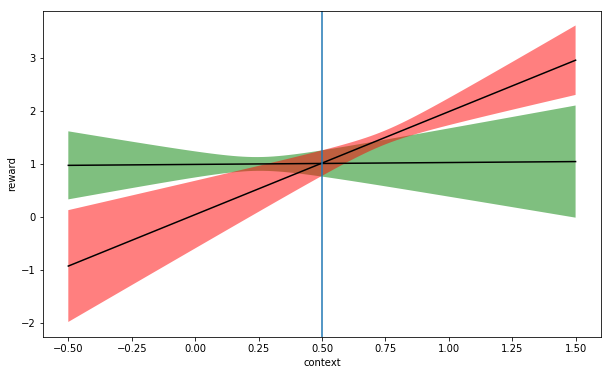

In [7]:
plt.fill_between(xvals, preds_low[:,0], preds_up[:,0], facecolor='green', alpha = 0.5)
plt.plot(xvals, preds[:,0], color='black')
plt.fill_between(xvals, preds_low[:,1], preds_up[:,1], facecolor='red', alpha = 0.5)
plt.plot(xvals, preds[:,1], color='black')
plt.axvline(x = 0.5)
plt.xlabel('context')
plt.ylabel('reward')
plt.savefig('./figs/demo_threshold.pdf')

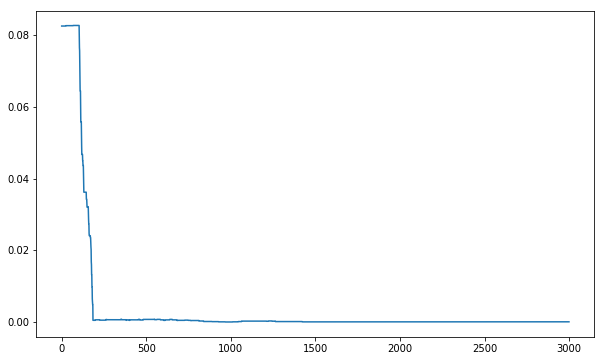

In [12]:
#Plot regret
plt.plot(smooth(regret_thr, box_pts = 200))

## Comparison of the two methods

Trade-off between convergence rate, risk, and confidence level

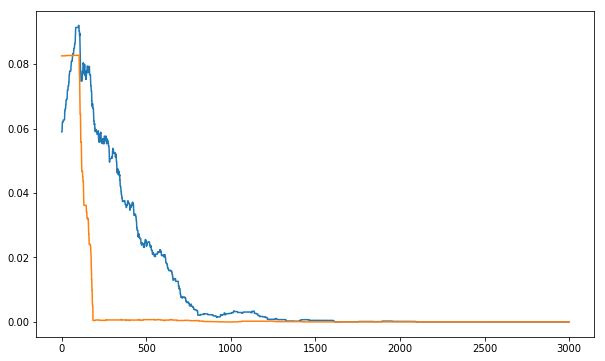

In [13]:
#Vary the confidence level, plot convergence rate, regret, risk
plt.plot(smooth(regret_ucb, box_pts = 200))
plt.plot(smooth(regret_thr, box_pts = 200))
